#DESAFÍO ENTREGABLE - Data Storytelling

Equipo de trabajo:

*   Lombardini Gabriela
*   Sosa Alonso Florencia Victoria


La base de datos seleccionada consiste en informacion sobre ventas y envios en EEUU.

Ademas de los precios, también incluye cantidades, descuentos, regiones de compra, datos de compradores (como el tipo de comprador según su tarea), categoria y sub categoria del producto, medio de envio, fecha de compra y envio, etc.

La dataset es de uso público y puede encontrarse en Tableau https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls

**Contexto comercial.** Las compras de algunos productos varían mucho. Quieren saber que ofertas brindar para obtener mejores ganancias. Los parámetros muestran informacion de precios, cantidades, descuentos y ganancias, además se pueden agrupar por regiones, categoria, tipo de comprador. El local te contrato para que construyas visualizaciones que les ayuden a identificar patrones de ventas y ganancias, lo que ayudaría a tomar acciones preventivas en las cantidades a comprar y que ofertas ofrecer. 

**Problema comercial.** Su tarea es limpiar los datos brindados y proporcionar visualizaciones que respondan las preguntas específicas del cliente, se mencionarán a continuación.

**Contexto analítico.** Se le proporciona un archivo EXCEL  que contiene detalles sobre producto, categoria, precio, región, descuentos, cantidades, etc.

1. Extraer información del archivo Excel proporcionado.
2. Leer, transformar y preparar datos para su visualización.
3. Realizar análisis y visualizaciones para identificar patrones.

El cliente nos presenta un conjunto específico de preguntas a las cuales deberíamos brindarle respuesta. Acompañado de visualizaciones.

1. ¿Qué región vende más?
2. ¿Cuál es la categoria mas comprada?
3. ¿Que tipo de comprador es el mas habitual?
4. ¿Cuáles son las 5 sub categorias que más facturaron?
5. ¿Cualés son los mayores descuentos por categoria y sub categoria?

   
**Dataset:**  <br> [dataset Sample Superstore](https://github.com/FSosaAlonso/DatasetSampleStore/raw/main/Sample-Superstore.xlsx)



In [ ]:
from google.colab import drive
import os
import pandas as pd

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# manejo de data
import pandas as pd
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.3f}'.format

# visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data

Cargamos el dataset:

In [ ]:
url= 'https://github.com/FSosaAlonso/DatasetSampleStore/raw/main/Sample-Superstore.xlsx'
df = pd.read_excel(url)
print(df.shape)
df.head()

(9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.000,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.000,41.914
1,2,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.000,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.000,219.582
2,3,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.000,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.000,6.871
3,4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.000,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.577,5,0.450,-383.031
4,5,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.000,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.200,2.516


Cambiaremos el nombre columnas, para evitar errores al utilizarlas luego y tener la misma estructura en las variables a utilizar

In [ ]:
df.shape

(9994, 21)

In [ ]:
df.rename(columns={'Row ID':'row_ID','Order ID':'order_ID', 'Order Date':'order_date', 
                   'Ship Date':'ship_date', 'Ship Mode':'ship_mode', 'Customer ID':'customer_ID', 
                   'Customer Name':'customer_name', 'Segment':'segment', 'Country/Region':'country/region',
                   'City':'city', 'State':'state', 'Postal Code':'postalcode', 'Region':'region', 
                   'Product ID':'product_ID', 'Category':'category', 'Sub-Category':'sub_category', 
                   'Product Name':'product_name', 'Sales':'sales', 'Quantity':'quantity', 'Discount':'discount', 'Profit':'profit'},
               inplace=True)

Para simplicidad en la consulta, se proporciona diccionario de descripciones de campos.

In [ ]:
d_desc = {'row_ID':'Número de identificación de la fila.','order_ID':'Código de identificación de la orden.',
          'order_date':'Fecha en que se realizó la orden.','ship_date':'Fecha en que se envió la orden.',
          'ship_mode':'Modo en que se envió.','customer_ID':'Código de identificación del cliente.',
          'customer_name':'Nombre del cliente','segment':'Clasificación de cliente segun tipo de consumidor.',
          'country/region':'País donde reside el cliente.','city':'Ciudad donde reside el cliente.',
          'state':'Estado donde reside el cliente.','postal_code':'Código postal del domicilio del cliente.',
          'region':'Ubicación cardinal del socio en la región.','product_ID':'Código de indentificación del producto comprado.',
          'category':'Categoría del tipo de producto comprado.','sub_category':'Sub-categoria del producto comprado. ',
          'product_name':'Nombre del producto comprado.','sales':'Precio de la venta.',
          'quantity':'Cantidad del producto vendido. ','discount':'Descuentos ofrecidos.',
            'profit':'Ganancia obtenida.'}

## Información básica del archivo 



In [ ]:
df.columns

Index(['row_ID', 'order_ID', 'order_date', 'ship_date', 'ship_mode',
       'customer_ID', 'customer_name', 'segment', 'country/region', 'city',
       'state', 'postalcode', 'region', 'product_ID', 'category',
       'sub_category', 'product_name', 'sales', 'quantity', 'discount',
       'profit'],
      dtype='object')

In [ ]:
df.describe()

,row_ID,postalcode,sales,quantity,discount,profit
count,9994.000,9983.000,9994.000,9994.000,9994.000,9994.000
mean,4997.500,55245.233,229.858,3.790,0.156,28.657
std,2885.164,32038.716,623.245,2.225,0.206,234.260
min,1.000,1040.000,0.444,1.000,0.000,-6599.978
25%,2499.250,23223.000,17.280,2.000,0.000,1.729
50%,4997.500,57103.000,54.490,3.000,0.200,8.666
75%,7495.750,90008.000,209.940,5.000,0.200,29.364
max,9994.000,99301.000,22638.480,14.000,0.800,8399.976


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   row_ID          9994 non-null   int64         
 1   order_ID        9994 non-null   object        
 2   order_date      9994 non-null   datetime64[ns]
 3   ship_date       9994 non-null   datetime64[ns]
 4   ship_mode       9994 non-null   object        
 5   customer_ID     9994 non-null   object        
 6   customer_name   9994 non-null   object        
 7   segment         9994 non-null   object        
 8   country/region  9994 non-null   object        
 9   city            9994 non-null   object        
 10  state           9994 non-null   object        
 11  postalcode      9983 non-null   float64       
 12  region          9994 non-null   object        
 13  product_ID      9994 non-null   object        
 14  category        9994 non-null   object        
 15  sub_

In [93]:
totalsales = df['sales'].sum()
print("Facturación total en ventas: ", totalsales)
totalq = df['quantity'].sum()
print("Cantidad total de unidades vendidas: ", totalq)
totaldesc = df['discount'].sum()
print("Importe total en descuentos: ", totaldesc)
totalgan = df['profit'].sum()
print("Ganancia total obtenida: ", totalgan)

Facturación total en ventas:  2297200.8603000003
Cantidad total de unidades vendidas:  37873
Importe total en descuentos:  1561.09
Ganancia total obtenida:  286397.0216999999


##**Limpieza**

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones mas comunes:


1.   Datos nulos en algunas celdas
2.   Columnas irrelevantes (innecesarias para resolver nuestro problema)
3.   Registros (filas) repetidos
4.   Valores extremos (outliers)


**1. Datos nulos**

Buscamos y sumamos la cantidad de datos nulos que tenga nuestro dataframe por columna.


In [ ]:
df.isnull().sum()

row_ID             0
order_ID           0
order_date         0
ship_date          0
ship_mode          0
customer_ID        0
customer_name      0
segment            0
country/region     0
city               0
state              0
postalcode        11
region             0
product_ID         0
category           0
sub_category       0
product_name       0
sales              0
quantity           0
discount           0
profit             0
dtype: int64

In [ ]:
df.isnull().any(axis=1).sum()

11

Eliminamos todos los datos nulos, ya que la cantidad de filas afectadas no afectarían notablemente nuestro analisis, y guardamos el dataframe en una nueva variable.

In [ ]:
df2 = df.dropna()

**2. Columnas irrelevantes**

Decidimos eliminar las columnas referidas al embarque de la orden ya que no tenemos el lugar de origen del mismo, por lo que esa información no será útil al momento del análisis.

In [ ]:
df2 = df.drop(['ship_mode', 'ship_date'], axis=1)

In [ ]:
df2.dtypes   

row_ID                     int64
order_ID                  object
order_date        datetime64[ns]
customer_ID               object
customer_name             object
segment                   object
country/region            object
city                      object
state                     object
postalcode               float64
region                    object
product_ID                object
category                  object
sub_category              object
product_name              object
sales                    float64
quantity                   int64
discount                 float64
profit                   float64
dtype: object

Examinaremos las columnas para ver la cantidad de valores unicos que tiene cada una.

In [ ]:
cols_cat = ['segment', 'country/region', 'city', 'state', 'region', 'category', 'sub_category', 'product_name']


for col in cols_cat:
	print(f'Columna {col}: {df2[col].nunique()} subniveles')

Columna segment: 3 subniveles
Columna country/region: 1 subniveles
Columna city: 531 subniveles
Columna state: 49 subniveles
Columna region: 4 subniveles
Columna category: 3 subniveles
Columna sub_category: 17 subniveles
Columna product_name: 1849 subniveles


La columna de 'country/region' tiene un solo valor, por lo que no aporta informacion que nos permita hacer una segmentación o analisis.

In [ ]:
df2 = df2.drop(['country/region'], axis = 1)

Además se crea una columna adicional, agrupando la fecha en años.

In [ ]:
df2['year_order'] = df['order_date'].dt.year 

**3. Registros repetidos**

Buscamos registros repetidos, pero no encontramos

In [ ]:
df2.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

In [ ]:
df2.duplicated().sum()

0

**4. Outliers**

Se buscan valores extremos en gráficas tipo "boxplot" de las variables numericas, no siempre se deben eliminar ya que pueden contener información importante.

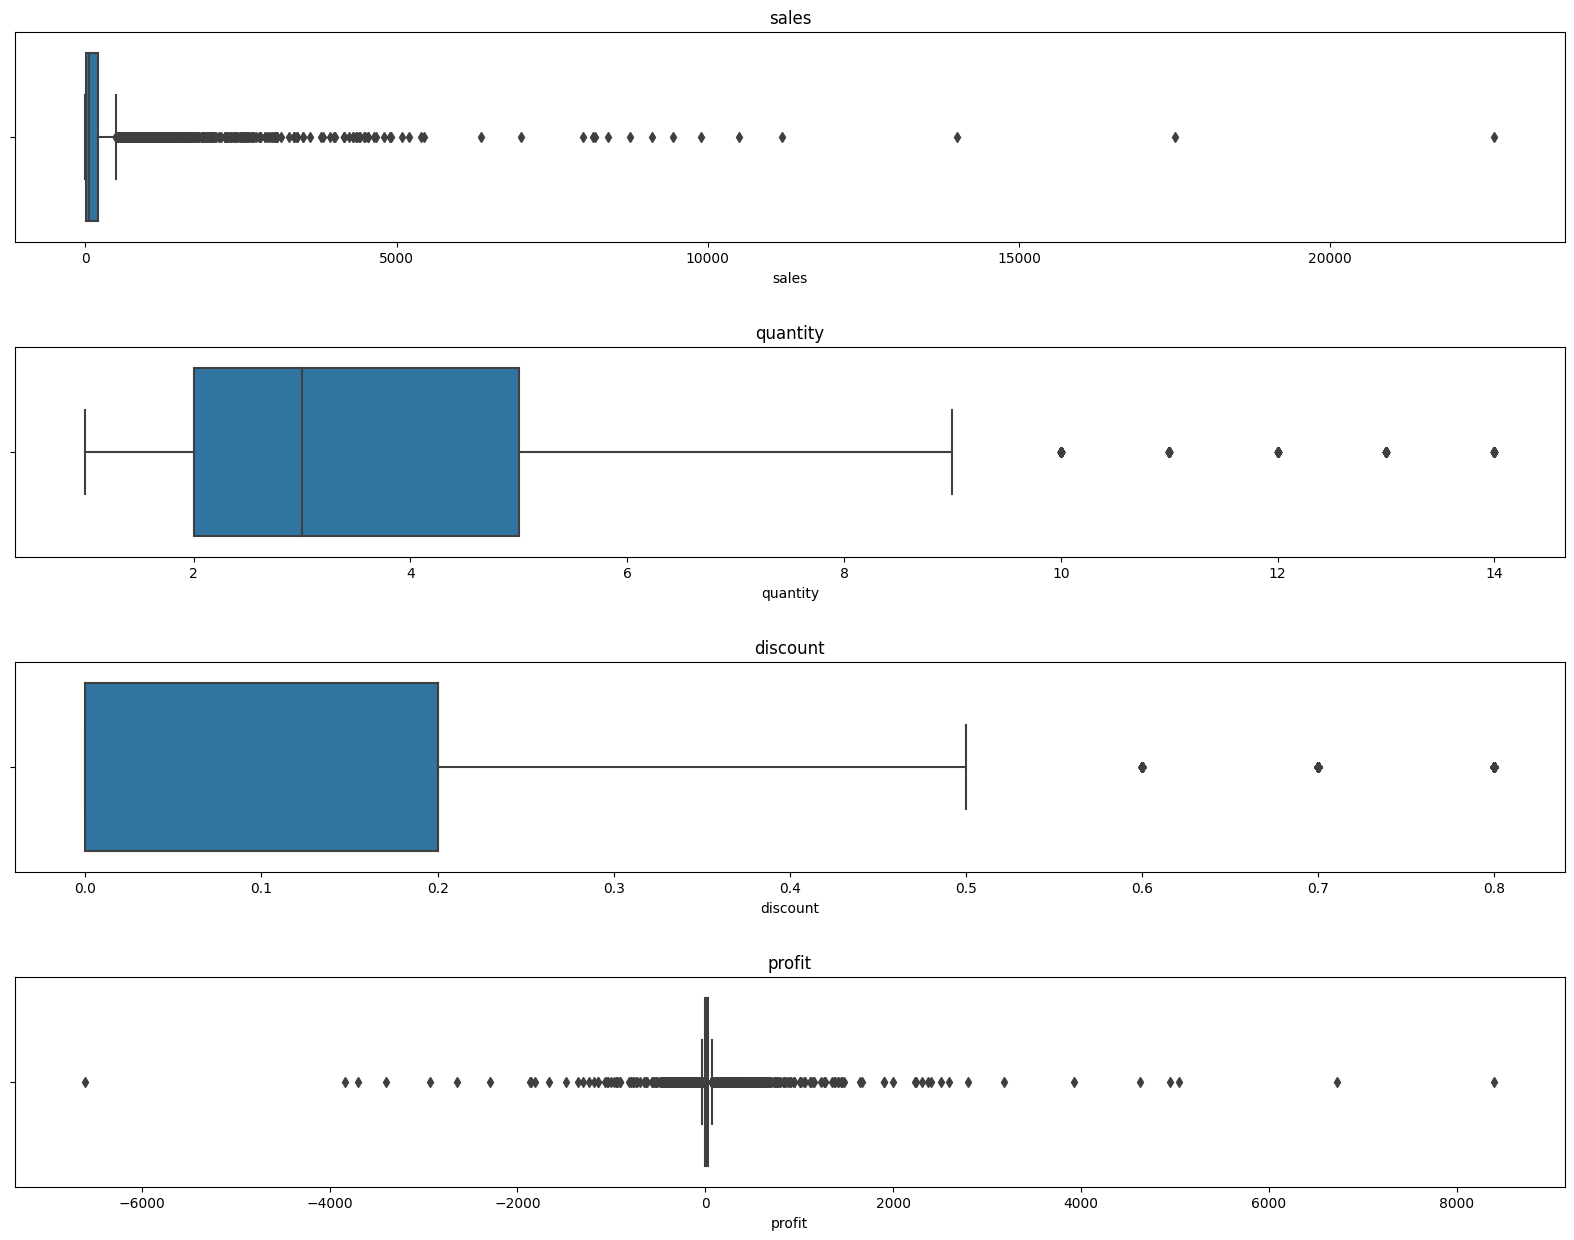

In [ ]:
cols_num = ['sales', 'quantity', 'discount', 'profit']

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(20, 15))

fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
	sns.boxplot(x=col, data= df2, ax=ax[i])
	ax[i].set_title(col)

Buscamos los límites superiores e inferiores de cada variable para evaluar la cantidad de valores que los superan.

In [ ]:
print("Rango intercuartil de Ventas: \n")

Q1ven = df2['sales'].quantile(0.25)
print("Primer cuartil: ", Q1ven)

Q3ven= df2['sales'].quantile(0.75)
print("Tercer cuartil: ", Q3ven)

IQRven= Q3ven - Q1ven
print("Rango intercuartil: ", IQRven)

Rango intercuartil de Ventas: 

Primer cuartil:  17.28
Tercer cuartil:  209.94
Rango intercuartil:  192.66


In [ ]:
LI_ven= (Q1ven - 1.5 * IQRven)
print("Límite inferior de ventas calculado: ", LI_ven )

LS_ven= (Q1ven + 1.5 * IQRven)
print("Límite superior de ventas calculado: ", LS_ven )

Límite inferior de ventas calculado:  -271.71000000000004
Límite superior de ventas calculado:  306.27


In [ ]:
print("Rango intercuartil de Cantidad: \n")

Q1cant= df2['quantity'].quantile(0.25)
print("Primer cuartil: ", Q1cant)

Q3cant= df2['quantity'].quantile(0.75)
print("Tercer cuartil: ", Q3cant)

IQRcant= Q3cant - Q1cant
print("Rango intercuartil: ", IQRcant)

Rango intercuartil de Cantidad: 

Primer cuartil:  2.0
Tercer cuartil:  5.0
Rango intercuartil:  3.0


In [ ]:
LI_cant= (Q1cant - 1.5 * IQRcant)
print("Límite inferior de cantidad calculado: ", LI_cant )

LS_cant= (Q1cant + 1.5 * IQRcant)
print("Límite superior de cantidad calculado: ", LS_cant )

Límite inferior de cantidad calculado:  -2.5
Límite superior de cantidad calculado:  6.5


In [ ]:
print("Rango intercuartil de Descuento: \n")

Q1desc= df2['discount'].quantile(0.25)
print("Primer cuartil: ", Q1desc)

Q3desc= df2['discount'].quantile(0.75)
print("Tercer cuartil: ", Q3desc)

IQRdesc= Q3desc - Q1desc
print("Rango intercuartil: ", IQRdesc)

Rango intercuartil de Descuento: 

Primer cuartil:  0.0
Tercer cuartil:  0.2
Rango intercuartil:  0.2


In [ ]:
LI_desc = (Q1desc - 1.5 * IQRdesc)
print("Límite inferior de descuento calculado: ", LI_desc )

LS_desc= (Q1desc + 1.5 * IQRdesc)
print("Límite superior de descuento calculado: ", LS_desc )

Límite inferior de descuento calculado:  -0.30000000000000004
Límite superior de descuento calculado:  0.30000000000000004


In [ ]:
print("Rango intercuartil de Ganancia: \n")

Q1gan= df2['profit'].quantile(0.25)
print("Primer cuartil: ", Q1gan)

Q3gan= df2['profit'].quantile(0.75)
print("Tercer cuartil: ", Q3gan)

IQRgan= Q3gan - Q1gan
print("Rango intercuartil: ", IQRgan)

Rango intercuartil de Ganancia: 

Primer cuartil:  1.72875
Tercer cuartil:  29.363999999999997
Rango intercuartil:  27.635249999999996


In [ ]:
LI_gan = (Q1gan - 1.5 * IQRgan)
print("Límite inferior de ganancia calculado: ", LI_gan )

LS_gan = (Q1gan + 1.5 * IQRgan)
print("Límite superior de ganancia calculado: ", LS_gan )

Límite inferior de ganancia calculado:  -39.724124999999994
Límite superior de ganancia calculado:  43.18162499999999


Contamos la cantidad de valores extremos que hay por columna

In [ ]:
Outsales = (df2['sales'] < LI_ven) | (df2['sales'] > LS_ven)
Outsales.value_counts()

False    8137
True     1857
Name: sales, dtype: int64

In [ ]:
Outcant = (df2['quantity'] < LI_cant) | (df2['quantity'] > LS_cant)
Outcant.value_counts()

False    8703
True     1291
Name: quantity, dtype: int64

In [ ]:
Outdesc = (df2['discount'] < LI_desc) | (df2['discount'] > LS_desc)
Outdesc.value_counts()

False    8828
True     1166
Name: discount, dtype: int64

In [ ]:
Outgan = (df2['profit'] < LI_gan) | (df2['profit'] > LS_gan)
Outgan.value_counts()

False    7475
True     2519
Name: profit, dtype: int64

Eliminamos filas en las columnas con menor cantidad de valores extremos para no modificar tanto la cantidad de datos originales para su análisis.

In [ ]:
dc1 = df2[~((df2['quantity'] < LI_cant) | (df2['quantity'] > LS_cant))]
dc1.shape

(8703, 19)

In [ ]:
dc2 = dc1[~((dc1['discount'] < LI_desc) | (dc1['discount'] > LS_desc))]
dc2.shape

(7702, 19)

In [ ]:
dc2.head()

,row_ID,order_ID,order_date,customer_ID,customer_name,segment,city,state,postalcode,region,product_ID,category,sub_category,product_name,sales,quantity,discount,profit,year_order
0,1,CA-2020-152156,2020-11-08,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.000,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.000,41.914,2020
1,2,CA-2020-152156,2020-11-08,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.000,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.000,219.582,2020
2,3,CA-2020-138688,2020-06-12,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036.000,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.000,6.871,2020
4,5,US-2019-108966,2019-10-11,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.000,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.200,2.516,2019
6,7,CA-2018-115812,2018-06-09,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032.000,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.000,1.966,2018


##Storytelling


El objetivo de este análisis es poder responder a las siguientes preguntas:
1.	¿Qué región vende más?
2.	¿Cuál es la categoria mas comprada?
3.	¿Que tipo de comprador es el mas habitual?
4.	¿Cuáles son las 5 sub categorias que más facturaron?
5.	¿Cualés son los mayores descuentos por categoria y sub categoria?

Lo que buscamos con este análisis es poder tener una mejor comprensión de las preferencias del cliente para poder focalizar en aquellas categorías que mas rentabilidad le proporciona a la compañía.
Para esto proponemos a continuación una serie de gráficos que les permitirán tener una mejor comprensión del análisis realizado.


**Aplicamos un describe para visualizar las funciones de agregacion en el DS**

In [ ]:
dc2.describe()

,row_ID,postalcode,sales,quantity,discount,profit,year_order
count,7702.000,7693.000,7702.000,7702.000,7702.000,7702.000,7702.000
mean,5009.370,55460.625,196.875,3.127,0.093,39.028,2019.721
std,2862.231,32942.241,530.043,1.398,0.103,195.228,1.126
min,1.000,1040.000,0.990,1.000,0.000,-786.014,2018.000
25%,2541.500,22204.000,17.088,2.000,0.000,3.389,2019.000
50%,5044.000,55407.000,50.910,3.000,0.000,9.389,2020.000
75%,7471.500,90036.000,191.966,4.000,0.200,29.484,2021.000
max,9994.000,99301.000,17499.950,6.000,0.300,8399.976,2021.000


Hacemos un agrupado con categoria y subcategoria para poder analizar los datos

In [ ]:
dc2.groupby(by=['category','sub_category']).mean()

row_ID  postalcode    sales  quantity  \
category        sub_category                                           
Furniture       Bookcases    4873.845   52412.946  447.400     3.014   
                Chairs       5084.900   58193.901  457.742     3.154   
                Furnishings  5007.097   50759.017   91.780     3.124   
                Tables       5118.012   69346.366  557.227     3.043   
Office Supplies Appliances   5123.762   52072.531  211.259     3.176   
                Art          4901.958   54340.229   28.002     3.119   
                Binders      5020.292   56258.545  163.359     3.199   
                Envelopes    4720.291   53796.964   56.077     2.987   
                Fasteners    4830.648   59146.291   11.396     3.401   
                Labels       5070.935   52942.220   25.640     3.061   
                Paper        5040.078   55612.728   48.457     3.118   
                Storage      4878.162   54041.575  227.551     3.144   
                Supplies     5235.169   56376.198  233.333     2.988   
Technology      Accessories  5109.999   56974.315  176.047     3.139   
                Copiers      5082.778   63005.074 2125.159     3.019   
                Machines     5197.304   60441.036 1540.400     3.232   
                Phones       5019.317   56818.699  309.672     3.074   

                              discount  profit  year_order  
category        sub_category                                
Furniture       Bookcases        0.121  32.402    2019.730  
                Chairs           0.173  31.511    2019.709  
                Furnishings      0.061  19.550    2019.744  
                Tables           0.162  24.435    2019.695  
Office Supplies Appliances       0.061  53.192    2019.669  
                Art              0.074   6.855    2019.724  
                Binders          0.127  66.817    2019.732  
                Envelopes        0.081  24.121    2019.614  
                Fasteners        0.079   3.827    2019.604  
                Labels           0.073  11.364    2019.689  
                Paper            0.074  21.197    2019.743  
                Storage          0.077  18.901    2019.713  
                Supplies         0.073  -1.966    2019.715  
Technology      Accessories      0.078  45.288    2019.775  
                Copiers          0.133 838.750    2019.796  
                Machines         0.130 415.116    2019.696  
                Phones           0.119  53.327    2019.717

**¿Qué región vende más?**

In [ ]:
salesxreg = dc2['sales'].groupby(dc2['region']).sum()
salesxreg

region
Central   339051.883
East      416205.529
South     230421.304
West      530654.609
Name: sales, dtype: float64

[Text(0.5, 1.0, 'Facturación por región')]

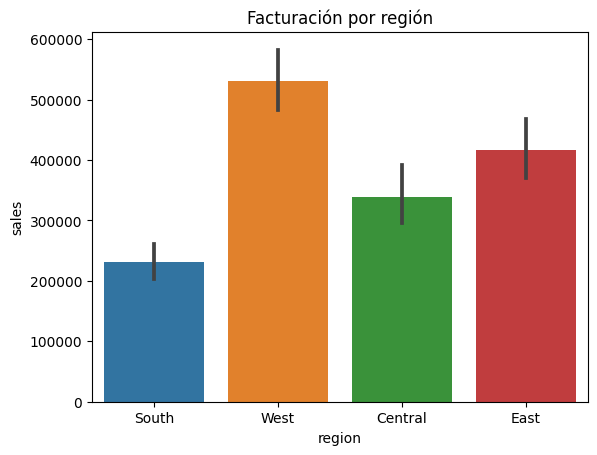

In [ ]:
sns.barplot(data=dc2, x="region", y = 'sales', estimator= sum).set(title = 'Facturación por región')

En el suma total de ventas por región podemos ver que la zona oeste es la que tiene un mayor capital vendido.

[Text(0.5, 1.0, 'Ventas por región segmentadas por año')]

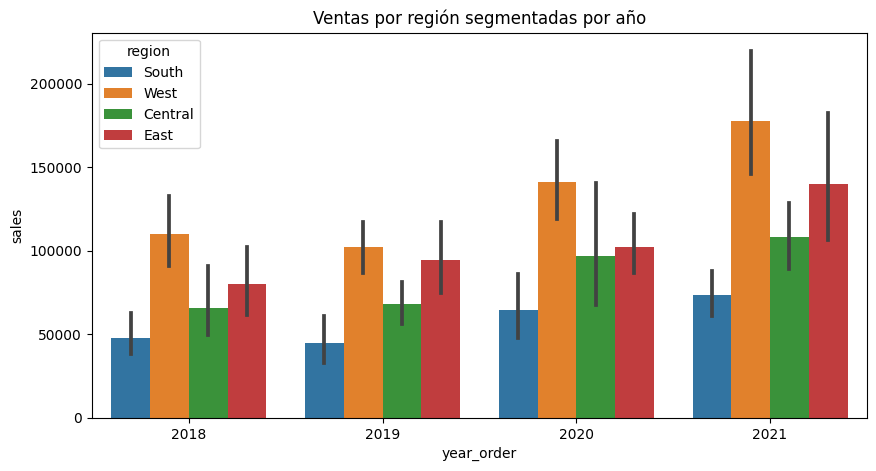

In [ ]:
plt.figure(figsize = (10,5))

sns.barplot(data=dc2, x="year_order", y="sales" , hue ="region", estimator= sum).set(title = 'Ventas por región segmentadas por año')

Al realizar una segmentación por año, vemos que la misma región oeste se destacá en importes vendidos todos los años.

**¿Cuál es la categoria mas comprada?**

In [ ]:
catsal = dc2['sales'].groupby(dc2['category']).sum()
catsal

category
Furniture         470680.154
Office Supplies   514378.909
Technology        531274.262
Name: sales, dtype: float64

Text(0, 0.5, 'Facturación')

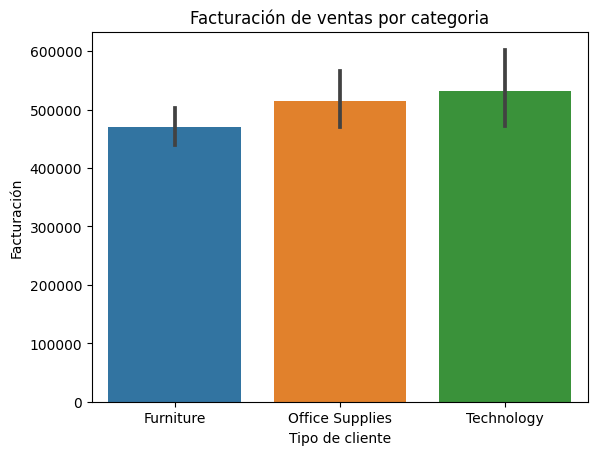

In [ ]:
ax = sns.barplot(data=dc2, x="category", y = 'sales', estimator = sum).set(title = 'Facturación de ventas por categoria')
plt.xlabel ('Tipo de cliente')
plt.ylabel ('Facturación')

[Text(0.5, 1.0, 'Cantidad de ventas por categoria')]

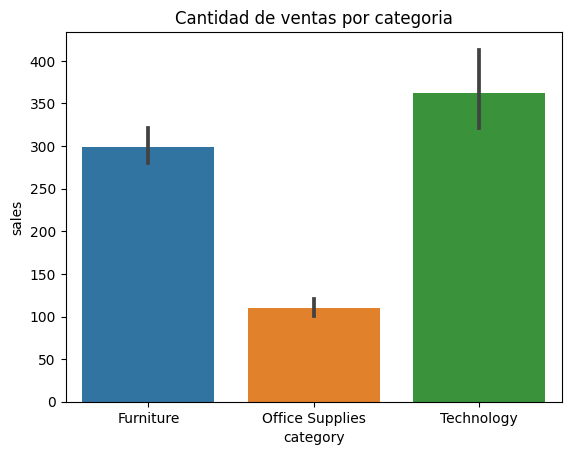

In [ ]:
sns.barplot(data=dc2, x="category", y = 'sales').set(title = 'Cantidad de ventas por categoria')

El gráfico bivariado entre categorias y ventas indica que los artículos tecnológicos son los mas vendidos, tanto en cantidad como en suma total por categoria. 

Dato extra: si analizamos los suplementos de oficina, vemos que son segundos en cuanto a suma total vendida y últimos (por mucha diferencia) si tenemos en cuenta la cantidad vendida. Lo que indicaría que vendendiendo menos productos se generan mayores valores de venta.

**¿Cuáles son las 5 sub_categorias que mas facturaron?**

In [ ]:
subcatsal = dc2['sales'].groupby(dc2['sub_category']).sum()
subcatsal.sort_values(ascending=False).head(5)

sub_category
Chairs        246722.926
Phones        212125.650
Storage       170435.566
Binders       129706.924
Accessories   118127.590
Name: sales, dtype: float64

[Text(0.5, 1.0, 'Facturación por sub categoria')]

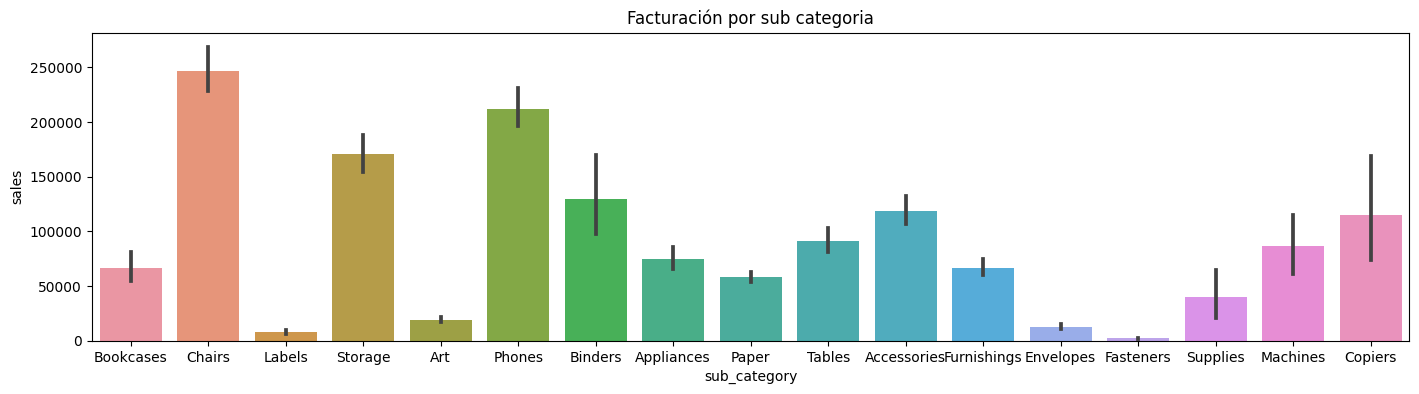

In [ ]:
plt.figure(figsize = (17,4))
sns.barplot(data=dc2, x="sub_category", y="sales", estimator= sum).set(title = 'Facturación por sub categoria')

Si analizamos el gráfico bivariado entre las ventas y las sub_categorias, podemos visualizar que el artículo sillas es el que más facturó, seguido por teléfonos, almacenamiento, carpetas y accesorios (respectivamente). 

**¿Que tipo de comprador es el mas habitual?**

In [ ]:
client = dc2['sales'].groupby(dc2['segment']).sum()
client

segment
Consumer      780533.142
Corporate     458170.398
Home Office   277629.786
Name: sales, dtype: float64

[Text(0.5, 1.0, 'Facturación segmentado según comprador')]

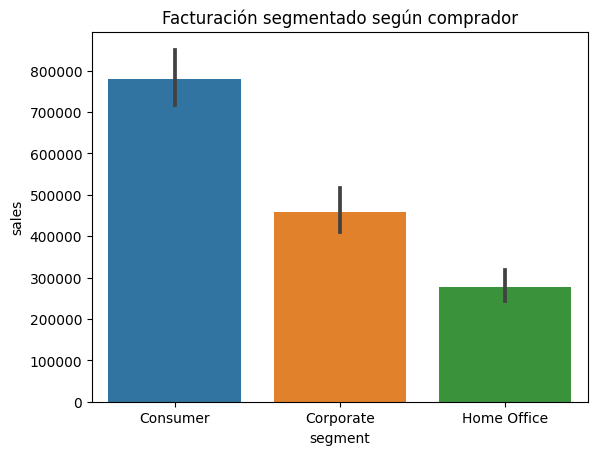

In [ ]:
sns.barplot(data=dc2, x="segment", y = 'sales', estimator= sum).set(title = 'Facturación segmentado según comprador')

In [ ]:
totalclient = dc2.segment.value_counts()
totalclient

Consumer       4023
Corporate      2292
Home Office    1387
Name: segment, dtype: int64

[Text(0.5, 1.0, 'Cantidad adquirida por cliente cliente')]

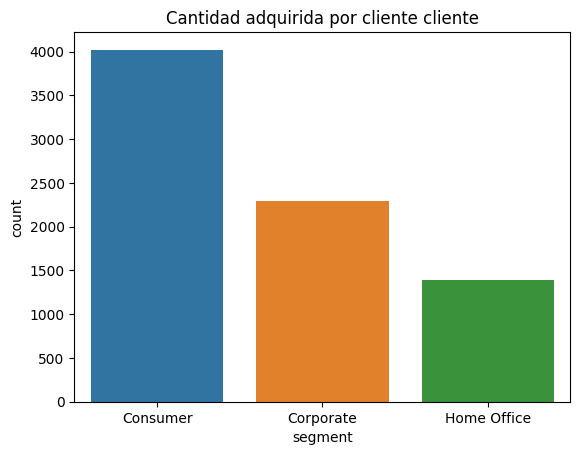

In [ ]:
sns.countplot(x='segment',data=dc2).set(title = 'Cantidad adquirida por cliente cliente')

El recuento que nos muestra este gráfico univariado indica que el consumidor final es el principal cliente de nuestra base de datos, luego el cliente corporativo y por último el home office. 

El mismo orden se respeta en suma facturada por tipo de cliente.

**¿Cualés son los mayores descuentos por categoria y sub-categoria?**

In [ ]:
dis1 = dc2['discount'].groupby(dc2['sub_category']).sum()
dis1.sort_values(ascending=False)

sub_category
Binders       100.600
Chairs         93.200
Paper          88.400
Phones         81.600
Storage        57.400
Accessories    52.200
Art            51.000
Furnishings    44.000
Tables         26.600
Labels         22.600
Appliances     21.600
Envelopes      18.000
Bookcases      17.850
Fasteners      14.400
Supplies       12.600
Machines        7.300
Copiers         7.200
Name: discount, dtype: float64

[Text(0.5, 1.0, 'Descuentos en cada sub categoria')]

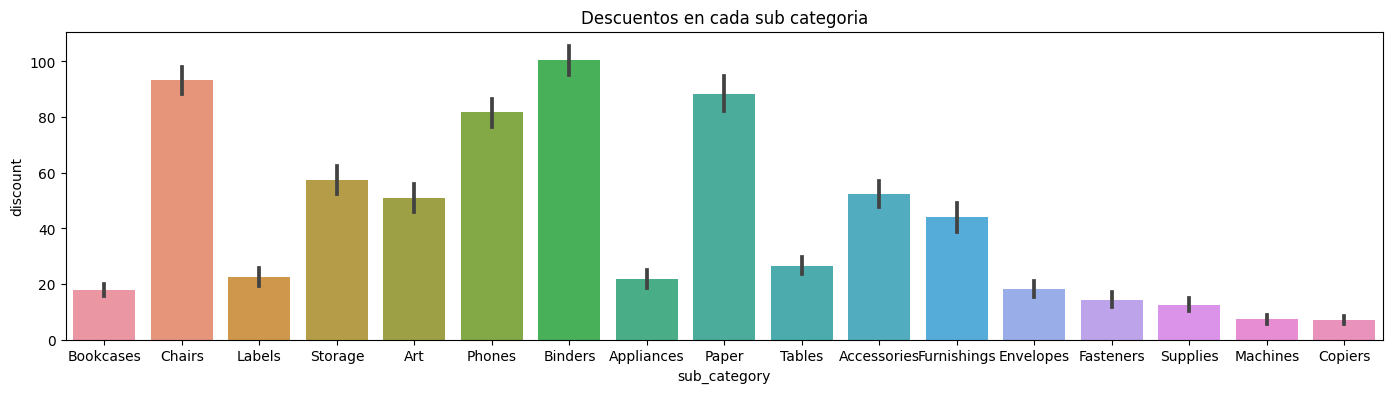

In [ ]:
plt.figure(figsize = (17,4))
sns.barplot(data=dc2, x="sub_category", y="discount", estimator= sum).set(title = 'Descuentos en cada sub categoria')

El gráfico bivariado anterior entre sub_categoria comprada y descuento ofrecido nos indica que: los artículos que reciben mayor descuento son carpetas, sillas, papel y teléfonos (en ese orden).

In [ ]:
dis2 = dc2['discount'].groupby(dc2['category']).sum()
dis2.sort_values(ascending=False)

category
Office Supplies   386.600
Furniture         181.650
Technology        148.300
Name: discount, dtype: float64

[Text(0.5, 1.0, 'Descuentos en cada categoria')]

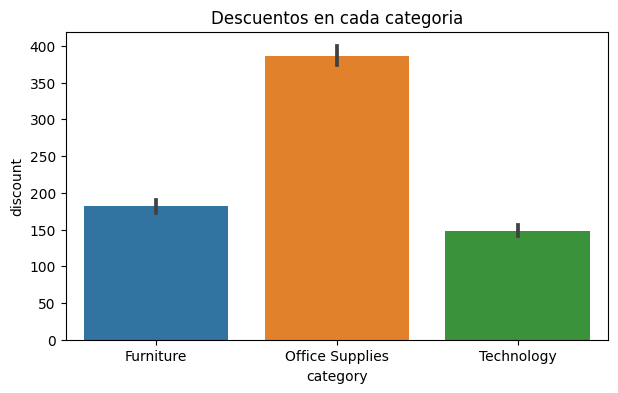

In [ ]:
plt.figure(figsize = (7,4))
sns.barplot(data=dc2, x="category", y="discount", estimator= sum).set(title = 'Descuentos en cada categoria')

En cuanto a la gráfico bivariado entre categorías y descuentos, los suplementos de oficina son los que reciben el mayor descuento.

##**Conclusión**

En base al análisis de los diferentes gráficos, recomendamos la implementación de un plan de acción estratégico para alcanzar nuestro objetivo. Durante el análisis, hemos identificado que el producto más vendido en términos de facturación son las sillas.

En vista de esta información, proponemos aprovechar el éxito de las sillas como un punto de partida para impulsar las ventas de otros productos. Recomendamos la creación de combos o promociones especiales, como la oferta de un descuento del 30% en el valor de una biblioteca al adquirir una silla. Esta estrategia busca incentivar a los clientes a realizar compras complementarias, aumentando así tanto la facturación como la satisfacción del cliente.

Al implementar este enfoque, esperamos fomentar una mayor demanda y mejorar la rentabilidad general del negocio. Recomendamos seguir monitoreando de cerca el impacto de estas acciones y ajustarlas en función de los resultados obtenidos para lograr los objetivos planteados de manera efectiva.

En resumen, a través del análisis de los gráficos, hemos identificado oportunidades claras para aumentar las ventas y fomentar compras adicionales. La propuesta de combinar el éxito de las sillas con descuentos en otros productos busca capitalizar estas oportunidades y lograr resultados positivos.
